In [2]:
import torch
import torch.nn as nn
import torch.optim as optim


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 여러개의 모델을 돌려서 성능이 좋은 것을 뽑아낸다.
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression # linear 주로 회귀지만 분류모델도 있어 logistic regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle #모델 저장
from sklearn import preprocessing

In [10]:
# display images
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2

# utils
import numpy as np
import pandas as pd
import time
import copy

In [9]:
import glob
import os

In [7]:
!nvidia-smi

Wed Aug 16 15:35:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   35C    P8    10W /  N/A |    287MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
crops=os.listdir('d:/Korean_emotion/crop/')
crops
crops
# len(crops)
image_0 = [c for c in crops if c.startswith("0_")]
print(len(image_0))
image_1 = [c for c in crops if c.startswith("1_")]
print(len(image_1))
image_2 = [c for c in crops if c.startswith("2_")]
print(len(image_2))

4888
4608
4179


------------
neutral +  sad

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('./neutral_sad.csv')
print(df.__len__())
df.head(5)

8787


,path,emotion
0,d:/Korean_emotion/crop/1_20201201132755-001-00...,1
1,d:/Korean_emotion/crop/1_20201201132755-001-01...,1
2,d:/Korean_emotion/crop/1_20201201132755-001-01...,1
3,d:/Korean_emotion/crop/1_20201201132808-002-01...,1
4,d:/Korean_emotion/crop/1_20201201132822-003-00...,1


In [28]:
import mediapipe as mp
import cv2

In [29]:
plist=df['path']
plist[0]

'd:/Korean_emotion/crop/1_20201201132755-001-006.jpg'

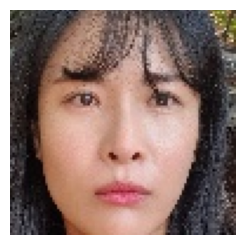

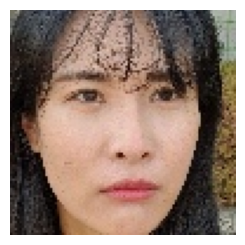

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

for i, path in enumerate(pathlist[:2]):

    plt.subplot(1,2,i+1)

    img= plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [3]:
import mediapipe as mp
import cv2
import numpy as np
from os import path
import csv


In [4]:
mp_face_mesh = mp.solutions.face_mesh

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [30]:
plist[0]

'd:/Korean_emotion/crop/1_20201201132755-001-006.jpg'

In [34]:
plist[0].split('/')[3].startswith('1_')

True

https://puleugo.tistory.com/4

In [22]:
import os
from os import path 

In [20]:
path.isfile('facemesh_imag.csv')

False

In [53]:
len(plist)

8787

In [ ]:
## 이미지 landmark 데이터 -> csv 로 저장 

from os import path

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # img = cv2.imread(pathlist[0])
    # # cv2.imshow('face', img)
    for p in plist:
        image=cv2.imread(p)

        result = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        try: 
            face = result.face_landmarks.landmark
            # print(face)

            face_list = []
            for temp in face:
                face_list.append([temp.x,temp.y,temp.z])
                    
            face_row = list(np.array(face_list).flatten()) # [[x1,y1,z1],[x2,y2,z2]] -> [x1,y1,z1,x2,y2,
        

            if path.isfile('facemesh_imag.csv')==False:# 1. csv파일이 없는 경우-> csv 파일 만들기 
                print('false')                                                    # 컬럼만들기 정답 lable 맨 앞으로 
                landmarks = ['class'] # 최종형태 : ['class', 'x1', 'y1', 'z1', 'x2', 'x3',... ]
                # print(landmarks)
                for val in range(1,len(face)+1):
                
                    landmarks += ['x{}'.format(val),'y{}'.format(val),'z{}'.format(val)]
        
                with open('facemesh_imag.csv' , mode='w', newline='') as f:
                    print('f')

                    csv_writer = csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)

                    print('writer')
                    csv_writer.writerow(landmarks)
                    print('writerow')

            else:
                if p.split('/')[3].startswith('1_') :
                    # print('1')
                    face_row.insert(0, '1')
                    
                        # ['happy', 0.1,0.4,..]
                    with open('facemesh_imag.csv',mode='a',newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(face_row)
            
                elif p.split('/')[3].startswith('2_'):
                    print('2')
                    face_row.insert(0,'2')
                    with open('facemesh_imag.csv',mode='a',newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(face_row)
        except:
            pass
            print('pass')

    

In [ ]:
df.read_csv('')

In [ ]:
# 랜드마크 감지를 위한 함수
face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, 
        max_num_faces=1, min_detection_confidence=0.5,min_tracking_confidence=0.3) 

In [24]:
# 얼굴 랜드마크 감지
def detectFacialLandmarks(image, face_mesh):
    # RGB로 변경 후 얼굴 랜드마크 감지 
    image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    result = holistic.process(image)
    
    return results    

In [ ]:
# landmark csv 로 저장     
    try:
        face = result.face_landmarks.landmark
        face_list = []
            for temp in face:
                face_list.append([temp.x,temp.y,temp.z])
            face_row = list(np.array(face_list).flatten()) # [[x1,y1,z1],[x2,y2,z2]] -> [x1,y1,z1,x2,y2,z2]


In [ ]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for path in pathlist:
        
        image = cv2.cvtColor(image)
        
        result = holistic.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image,
            result.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(255,0,0),thickness=1,circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1))

        try:
            face = result.face_landmarks.landmark
            ## 리스트 만들기 
            # sad -> [x,y,z]  
            # happy -> 
            face_list = []
            for temp in face:
                face_list.append([temp.x,temp.y,temp.z])
            face_row = list(np.array(face_list).flatten()) # [[x1,y1,z1],[x2,y2,z2]] -> [x1,y1,z1,x2,y2,z2]

            if path.isfile('facedata.csv') == False:# 1. csv파일이 없는 경우-> csv 파일 만들기 
                                                                            # 컬럼만들기 정답 lable 맨 앞으로 
                landmarks = ['class'] # 최종형태 : ['class', 'x1', 'y1', 'z1', 'x2', 'x3',... ]
                for val in range(1,len(face)+1):
                    landmarks += ['x{}'.format(val),'y{}'.format(val),'z{}'.format(val)]

                with open('facedata.csv' , mode='w', newline='') as f:
                    csv_writer = csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(landmarks)
                f.close()
            else:
                if cv2.waitKey(1) & 0xFF == ord('1'):
                    face_row.insert(0,'happy')
                      # ['happy', 0.1,0.4,..]
                    with open('facedata.csv',mode='a',newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(face_row)
                    f.close()
                elif cv2.waitKey(1) & 0xFF == ord('2'):
                    face_row.insert(0,'sad')
                    with open('facedata.csv',mode='a',newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(face_row)
                    f.close()

        except:
            pass

        cv2.imshow('face',image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

In [20]:
# x,y split 


xs = np.array(df['path'])
ys = np.array(df['emotion'])

train_x, valid_x, train_y, valid_y = train_test_split(xs, ys, test_size=0.2)
train_x, test_x, train_y, test_y = train_test_split(xs, ys, test_size=0.2)

train_x = np.array([cv2.imread(item, cv2.IMREAD_GRAYSCALE) / 255 for item in train_x]).reshape(train_x.shape[0], 96, 96, 1)
valid_x = np.array([cv2.imread(item, cv2.IMREAD_GRAYSCALE) / 255 for item in valid_x]).reshape(valid_x.shape[0], 96, 96, 1)
test_x = np.array([cv2.imread(item, cv2.IMREAD_GRAYSCALE) / 255 for item in test_x]).reshape(test_x.shape[0], 96, 96, 1)

In [28]:
le = preprocessing.LabelEncoder()
train_y= le.fit_transform(train_y)
valid_y= le.fit_transform(valid_y)
test_y= le.fit_transform(test_y)

In [ ]:
train_x

In [22]:
ys

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


class DataHandle:
    def __init__(self):
        self.db = []
        self.img = None
        self.new_file_path = ''


    def _detect_crop_img(self, img_path):
        try:
            self.img= cv2.imread(img_path)
                                                    
            face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
            gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
         
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            for (x,y,w,h) in faces:
              
                    img = self.img.copy()
                    roi = img[y:y+h,x:x+w]
                    resize = cv2.resize(roi,(96,96), interpolation=cv2.INTER_CUBIC)

                    self.img= resize
                    plt.subplot(1,3,i+1)
                    print(i)
                    plt.imshow(gray)
                    return True

        except:
            return False
            
   
    def work(self, img_path,folder,emotion, name):
 
            self.img = cv2.imread(img_path)
  
            if  self._detect_crop_img(img_path): # True

                self.new_file_path = f'./{folder}/{emotion}_{name}'
                self.db.append({
                    'path': self.new_file_path,
                    'emotion': emotion
                })

                cv2.imwrite(self.new_file_path, self.img)


In [ ]:
# EmotionClassifier 모델 정의
class EmotionClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EmotionClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 24 * 24, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 하이퍼파라미터
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2 # neutral , sad 

In [12]:
crops=os.listdir('d:/Korean_emotion/crop/')


In [ ]:
dataset = glob.glob(os.path.join('./dataset', '*.jpg'))
print(len(dataset))